In [70]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_rows = 20

#from soma.aims.lazy_read_data import LazyReadData
from soma import aims

In [28]:
path2rescaled_skels = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/skeletons/2mm/R"

In [31]:
count_voxels = {}

for i,file in enumerate(os.listdir(path2rescaled_skels)):
    if file.endswith(".nii.gz"):
        subject_name = file
        subject_name = subject_name.replace("resampled_skeleton_", "")
        subject_name = subject_name[1:-7]
        print(i, subject_name)
        
        file_path = os.path.join(path2rescaled_skels, file)

        # get the array thanks to aims
        vol = aims.read(file_path)

        arr = np.asarray(vol)

        count = np.count_nonzero(arr)

        count_voxels[subject_name] = count

count_df = pd.DataFrame.from_dict(count_voxels, orient='index', columns=["count"])

count_df = count_df.sort_values(by='count')

count_df

1 sub-3297409
3 sub-1480046
6 sub-3223524
7 sub-2728307
9 sub-1489596
13 sub-1722907
14 sub-5391046
16 sub-2541165
17 sub-3783118
19 sub-1124947
25 sub-5254638
31 sub-2178551
33 sub-1187029
34 sub-1482545
39 sub-5086299
45 sub-5925506
46 sub-5020679
47 sub-1426174
48 sub-1241484
51 sub-1002986
53 sub-1080689
54 sub-1904930
60 sub-3542532
64 sub-5456712
67 sub-3997832
69 sub-5344468
71 sub-2953677
72 sub-4473479
73 sub-3411481
74 sub-4822299
78 sub-3351746
80 sub-2945280
82 sub-1674647
86 sub-4518174
87 sub-1691195
89 sub-3818231
90 sub-3025491
92 sub-3923377
93 sub-5331137
94 sub-1904912
96 sub-5360604
99 sub-5925530
103 sub-2528797
105 sub-5907151
106 sub-1261809
107 sub-3708600
108 sub-3567315
110 sub-2545591
111 sub-3976006
112 sub-2344898
113 sub-2729106
116 sub-1249508
117 sub-1774544
118 sub-1185514
119 sub-1881442
120 sub-5062606
121 sub-5847605
125 sub-5356222
126 sub-5495473
127 sub-4588275
130 sub-2122201
131 sub-2582656
132 sub-2905339
133 sub-3755982
134 sub-4589882
138 sub

KeyboardInterrupt: 

In [33]:
#count_df.to_csv("./UKB_count_voxels.csv")
count_df = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/UKB_count_voxels.csv", index_col=0)
count_df

,count
sub-2859308,14277
sub-5201474,14333
sub-2967866,14438
sub-2707712,14502
sub-4770610,14590
sub-4897231,14609
sub-2724047,14734
sub-3387900,14736
sub-2562798,14816
sub-1082411,14825


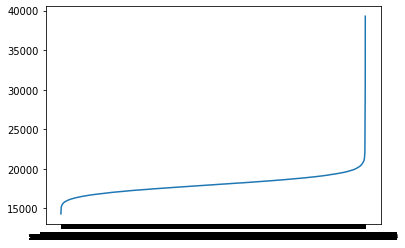

In [34]:
plt.plot(count_df['count'])

In [72]:
quant = count_df['count'].quantile(q=0.9)

percent = 20
factor = 1+percent/100

print(quant, factor*quant)

exclude = count_df[count_df['count'] >= factor*quant]

print(exclude.shape[0])
exclude

19328.0 23193.6
19


,count
sub-5894417,23280
sub-2809323,23440
sub-1897786,24292
sub-4517280,24436
sub-2247652,24786
sub-1195093,24839
sub-4485612,24937
sub-2100108,25529
sub-4635239,25534
sub-4220393,25651


In [73]:
exclude.to_csv("./bad_qc.csv")

In [99]:
count_df = count_df[~count_df.index.isin(exclude.index)]
count_df

,count
sub-2859308,14277
sub-5201474,14333
sub-2967866,14438
sub-2707712,14502
sub-4770610,14590
sub-4897231,14609
sub-2724047,14734
sub-3387900,14736
sub-2562798,14816
sub-1082411,14825


In [24]:
n_subjects = 1114

least_folded_sub = count_df.iloc[0:n_subjects,:].index
most_folded_sub = count_df.iloc[-n_subjects:,:].index

print(least_folded_sub)
print(most_folded_sub)

Index(['sub-2859308', 'sub-5201474', 'sub-2967866', 'sub-2707712',
       'sub-4770610', 'sub-4897231', 'sub-2724047', 'sub-3387900',
       'sub-2562798', 'sub-1082411',
       ...
       'sub-3882121', 'sub-2371387', 'sub-2697979', 'sub-4746824',
       'sub-2426840', 'sub-5729360', 'sub-1160063', 'sub-2123483',
       'sub-4794197', 'sub-1458379'],
      dtype='object', length=1114)
Index(['sub-4469507', 'sub-3784604', 'sub-1959785', 'sub-5531966',
       'sub-5079960', 'sub-2917814', 'sub-4894505', 'sub-4714473',
       'sub-6009541', 'sub-5519409',
       ...
       'sub-3396940', 'sub-2955962', 'sub-2718550', 'sub-5894417',
       'sub-2809323', 'sub-1897786', 'sub-4517280', 'sub-2247652',
       'sub-1195093', 'sub-4485612'],
      dtype='object', length=1114)


In [25]:
least_folded_sub = pd.DataFrame(least_folded_sub, columns=['Subject'])
most_folded_sub = pd.DataFrame(most_folded_sub, columns=['Subject'])

In [26]:
least_folded_sub.to_csv("./least_folded_1114.csv", index=False)
most_folded_sub.to_csv("./most_folded_1114.csv", index=False)

## Generate QC file UKB

In [77]:
save_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank"

missing_R_graphs = pd.read_csv(save_path+'/missing_R_graphs.csv', index_col=0, header=None)
too_many_voxels = pd.read_csv(save_path+'/too_many_voxels.csv', index_col=0)

In [78]:
# initializing

index = np.concatenate([count_df.index.values, missing_R_graphs.index.values])

qc_df = pd.DataFrame(columns=['qc', 'comments'], index=index)
qc_df = qc_df.assign(qc=1)
qc_df = qc_df.assign(comments='')

qc_df

,qc,comments
sub-2859308,1,
sub-5201474,1,
sub-2967866,1,
sub-2707712,1,
sub-4770610,1,
sub-4897231,1,
sub-2724047,1,
sub-3387900,1,
sub-2562798,1,
sub-1082411,1,


In [96]:
qc_df.loc[missing_R_graphs.index, 'qc'] = 0
qc_df.loc[missing_R_graphs.index, 'comments'] = 'missing R graph'

qc_df.loc[too_many_voxels.index, 'qc'] = 0
qc_df.loc[too_many_voxels.index, 'comments'] = 'too many voxels (more than 1.2 x 90th quantile)'

qc_df

,qc,comments
sub-2859308,1,
sub-5201474,1,
sub-2967866,1,
sub-2707712,1,
sub-4770610,1,
sub-4897231,1,
sub-2724047,1,
sub-3387900,1,
sub-2562798,1,
sub-1082411,1,


In [98]:
qc_df.to_csv(save_path+'/qc.tsv', sep='\t')